**1.3.4. [Advanced operations](http://scipy-lectures.org/intro/numpy/advanced_operations.html)**

本节内容：
- Polynomials （多项式）
- Loading data files

# 1.3.4.1. Polynomials

NumPy also contains polynomials in different bases:

For example, 3x^2 + 2x - 1:

<div align="center">
    <img src="http://scipy-lectures.org/_images/math/f4ea23bdd0b69c87887d2fe432ebe15693927483.png">
</div>    

In [25]:
import numpy as np
import matplotlib.pyplot as plt

p = np.poly1d([3, 2, -1])
p(0)

-1

In [26]:
p.roots


array([-1.        ,  0.33333333])

In [27]:
x = np.linspace(0, 1, 20)
x

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [28]:
y = np.cos(x) + 0.3*np.random.rand(20)
y

array([1.08537562, 1.10378125, 1.14692072, 1.06344988, 1.16056722,
       1.17396094, 0.95733769, 0.98999172, 1.0842389 , 1.17668936,
       0.92249813, 0.97032969, 1.04419679, 0.87888577, 0.92213931,
       0.87942808, 0.92188692, 0.92522464, 0.86551083, 0.71858412])

In [45]:
p = np.poly1d(np.polyfit(x, y, 3))
p

poly1d([ 0.04294626, -0.36591925,  0.00635077,  1.11025575])

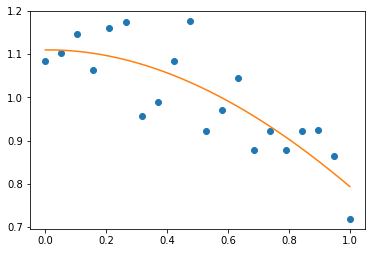

In [49]:
t = np.linspace(0, 1, 200)
plt.plot(x, y, 'o', t, p(t), '-')   
plt.show()

## More polynomials (with more bases)

NumPy多项式也有一个更复杂的接口,支持如切比雪夫基础（Chebyshev basis）。

<div align="center">
    <img src="http://scipy-lectures.org/_images/math/f4ea23bdd0b69c87887d2fe432ebe15693927483.png">
</div>    

In [61]:
p = np.polynomial.Polynomial([-1, 2, 3]) # coefs in different order!
p(0)

-1.0

In [62]:
p.roots()

array([-1.        ,  0.33333333])

In [63]:
p.degree()  # In general polynomials do not always expose 'order'

2

Example using polynomials in Chebyshev basis, for polynomials in `range [-1, 1]`:

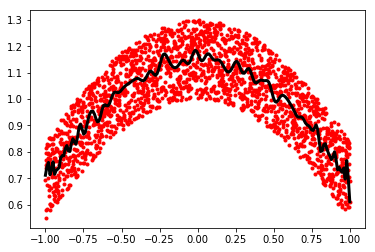

In [71]:
x = np.linspace(-1, 1, 2000)
y = np.cos(x) + 0.3*np.random.rand(2000)
p = np.polynomial.Chebyshev.fit(x, y, 90)

t = np.linspace(-1, 1, 200)
plt.plot(x, y, 'r.')  
plt.plot(t, p(t), 'k-', lw=3) 
plt.show()

The Chebyshev polynomials have some advantages in interpolation.

# 1.3.4.2. Loading data files

**Text files**


In [73]:
data = np.loadtxt('code/populations.txt')
data    

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

In [76]:
np.savetxt('code/pop2.txt', data)
data2 = np.loadtxt('pop2.txt')
data2

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

**Note** If you have a complicated text file, what you can try are:
- `np.genfro-mtxt`
- Using Python’s I/O functions and e.g. regexps for parsing (Python is quite well suited for this)

**Reminder: Navigating the filesystem with IPython**

In [77]:
pwd

'/home/qinjh/workspace/python/DataAnalysisWithPython/ScipyLectureNotes/chapter03'

In [78]:
cd code

/home/qinjh/workspace/python/DataAnalysisWithPython/ScipyLectureNotes/chapter03/code


In [85]:
ls

elephant.png  pop2.txt  populations.txt


In [88]:
cd ..

/home/qinjh/workspace/python/DataAnalysisWithPython/ScipyLectureNotes/chapter03


**Images**

In [1]:
# Using Matplotlib:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('code/elephant.png')
img.shape, img.dtype

((391, 615, 3), dtype('float32'))

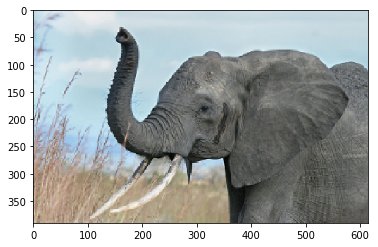

In [2]:
plt.imshow(img) 
plt.show()

In [3]:
plt.savefig('code/plot.png')

<Figure size 432x288 with 0 Axes>

In [4]:
plt.imsave('code/red_elephant.png', img[:,:,0], cmap=plt.cm.gray)

This saved only one channel (of RGB):

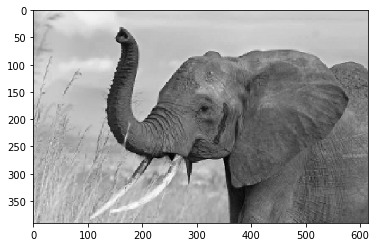

In [5]:
plt.imshow(plt.imread('code/red_elephant.png'))  

Other libraries:

/home/qinjh/workspace/python/DataAnalysisWithPython/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


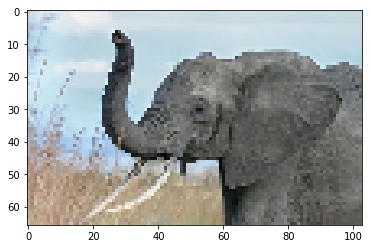

In [9]:
from scipy.misc import imsave
imsave('code/tiny_elephant.png', img[::6,::6])
plt.imshow(plt.imread('code/tiny_elephant.png'), interpolation='nearest')  

**NumPy’s own format**

In [11]:
# NumPy has its own binary format, not portable but with efficient I/O:

data = np.ones((3, 3))
np.save('code/pop.npy', data)
data3 = np.load('code/pop.npy')
data3

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

**Well-known (& more obscure) file formats**

- HDF5: [h5py](http://www.h5py.org/), [PyTables](http://www.pytables.org/)
- NetCDF: `scipy.io.netcdf_file`, [netcdf4-python](http://code.google.com/p/netcdf4-python/), …
- Matlab: `scipy.io.loadmat`, `scipy.io.savemat`
- MatrixMarket: `scipy.io.mmread`, `scipy.io.mmwrite`
- IDL: `scipy.io.readsav`

… if somebody uses it, there’s probably also a Python library for it.


**NumPy internals**

If you are interested in the NumPy internals, there is a good discussion in [Advanced NumPy](http://scipy-lectures.org/advanced/advanced_numpy/index.html#advanced-numpy).
